import libraries

In [589]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib.style as stl
import seaborn as sns

import data

In [590]:
data=pd.read_csv("/content/TikTok_songs_2022.csv")

data.head()

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4,167303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.3500,0.000000,0.1500,0.841,131.430,4,163026
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4,238805
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.0995,0.000000,0.3350,0.722,108.966,4,191822


In [591]:
data.keys()

Index(['track_name', 'artist_name', 'artist_pop', 'album', 'track_pop',
       'danceability', 'energy', 'loudness', 'mode', 'key', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'duration_ms'],
      dtype='object')

In [592]:
#data=data.drop(["date","street","statezip"],axis=1)

In [593]:
data=data.drop(["track_name","album","artist_name"],axis=1)

In [594]:
#data=data.drop(["city","country"], axis=1)

In [595]:
#data=data.drop(["Age","Passenger Class","Embarked"], axis=1)

In [596]:
data.head

<bound method NDFrame.head of      artist_pop  track_pop  danceability  energy  loudness  mode  key  \
0            81         95         0.629   0.547   -13.123     0   10   
1            91         96         0.520   0.731    -5.338     0    6   
2            73         44         0.768   0.716    -5.110     1   10   
3            80         89         0.761   0.525    -6.900     1   11   
4            81         92         0.836   0.743    -6.305     0   10   
..          ...        ...           ...     ...       ...   ...  ...   
258          78         84         0.640   0.740    -4.083     1    4   
259          75         90         0.609   0.692    -2.958     1    1   
260          95         92         0.529   0.673    -4.711     1    0   
261          64         80         0.377   0.558    -9.076     1    4   
262          67         71         0.820   0.611    -5.020     0    9   

     speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0         0.0

In [597]:
data.shape

(263, 15)

Before applying PCA we should first scale the data

In [598]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data)

StandardScaler()

In [599]:
scaled_data=scaler.transform(data)

In [600]:
scaled_data

array([[ 0.92832751,  1.41024112, -0.73480533, ..., -0.59583328,
         0.10575869,  3.57951074],
       [ 1.48045356,  1.45035505, -1.66247804, ...,  2.09633501,
         0.10575869, -0.21179261],
       [ 0.48662668, -0.63556941,  0.44819015, ...,  0.35097383,
         0.10575869, -0.33498188],
       ...,
       [ 1.70130397,  1.28989932, -1.58588121, ...,  1.76742683,
         0.10575869,  1.25893239],
       [-0.01028676,  0.80853214, -2.87951656, ...,  1.11240304,
        -3.37105822,  1.15625066],
       [ 0.15535105,  0.44750675,  0.89074961, ...,  0.20530803,
         0.10575869, -1.19595309]])

In [601]:
scaled_data.shape

(263, 15)

Applying PCA

In [602]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

See how the features are reduced from 15 to 2!

In [603]:
x_pca=pca.transform(scaled_data)
x_pca.shape

(263, 2)

In [604]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
cluster_labels = kmeans.predict(data)

Text(0, 0.5, 'Second principle component')

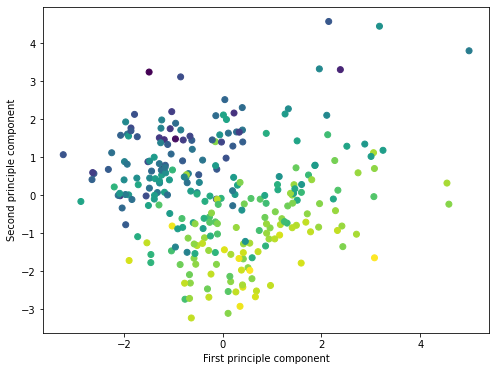

In [605]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=data['artist_pop'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')